In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

import pandas as pd

In [2]:
df = pd.read_csv('AIerror_ONU16_15S_Cycle&Grantold&Ai.csv', usecols=[1, 2], engine='python')
df.head()

,Gi-1,Ai
0,472,906
1,906,472
2,472,906
3,906,472
4,472,906


In [3]:
df = df.values
df = df.astype('float32')

In [4]:
#df2 = []

#for i in range(len(df)):
#    if(df[i] > 195000.0):
#        df[i] = 195000.0
#    df2.append(df[i])

In [5]:
#df = df2
df = df[:1000]
print(len(df))

1000


In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.7) 
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

700 300


In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

In [9]:
# reshape into X=t and Y=t+1
look_back = 10 #16
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, 2))
testX = np.reshape(testX, (testX.shape[0], look_back, 2))
#print(trainX.shape[1])
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(689, 10, 2)
(689, 2)
(289, 10, 2)
(289, 2)


In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(40, input_shape=(look_back, 2)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=1) #64 & 128

Epoch 1/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 11/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 13/100
22/22 [=================

In [ ]:
#inputsR = Input(shape=(timesteps,))
inputsA = Input(shape=(look_back,))
inputsG = Input(shape=(look_back,))
#inputs = LayerNormalization(axis=1)(inputs)
#inputs_R_test = Reshape((inputs_R.shape[1],1))(inputs_R)
inputs_A_test = Reshape((inputs_A.shape[1],1))(inputs_A)
inputs_G_test = Reshape((inputs_G.shape[1],1))(inputs_G)
input_merge = concatenate([inputs_A_test,inputs_Gtest], axis = 1)
tgt1 = Reshape((look_back,2))(input_merge)


tgt1 = LSTM(units=40, return_sequences = True, inputshape=(look_back,2))(tgt1)
tgt1 = Dropout(0.2)(tgt1)

tgt2 = LSTM(units=40,return_sequences = True)(tgt1)
tgt2 = Dropout(0.2)(tgt2)

tgt3 = LSTM(units=40,return_sequences = True)(tgt2)
tgt3 = Dropout(0.2)(tgt3)

tgt4 = LSTM(units=40)(tgt3)
tgt4 = Dropout(0.2)(tgt4)

#tgt5 = Flatten()(tgt4)
predictions = Dense(1, activation='relu')(tgt4)


model = Model(inputs=[inputs_A, inputs_G], outputs=predictions)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse','mae'])

history = model.fit([X_train_A, X_train_G], Y_train_A, epochs=100, batch_size=32) #[1,0,0], [0,0,1]

In [11]:
#inputs = Input(shape=(look_back,))
#inputs = LayerNormalization(axis=1)(inputs)
#tgt1 = tf.keras.layers.Reshape((look_back,2),input_shape=(look_back,))(inputs)

#tgt1 = LSTM(units=40,return_sequences = True,input_shape=(look_back,2))(tgt1)
#tgt1 = Dropout(0.2)(tgt1)

#tgt2 = LSTM(units=40,return_sequences = True)(tgt1)
#tgt2 = Dropout(0.2)(tgt2)

#tgt3 = LSTM(units=40,return_sequences = True)(tgt2)
#tgt3 = Dropout(0.2)(tgt3)

#tgt4 = LSTM(units=40)(tgt3)
#tgt4 = Dropout(0.2)(tgt4)

#predictions = Dense(1)(tgt1)

#model = Model(inputs=inputs, outputs=predictions)
#model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['mse','mae'])

#history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_split=0.3) #[1,0,0], [0,0,1]
regressor = Sequential()

regressor.add(LSTM(units = 40, return_sequences = True, input_shape = (look_back, 2)))
regressor.add(Dropout(0.2))
#'''
regressor.add(LSTM(units = 40, return_sequences = True))
regressor.add(Dropout(0.2))
              
regressor.add(LSTM(units = 40, return_sequences = True))
regressor.add(Dropout(0.2)) 
#'''
regressor.add(LSTM(units = 40))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')#  mean_absolute_error mean_squared_error huber

history = regressor.fit(trainX, trainY, epochs = 100, batch_size = 32, verbose=1)

Epoch 1/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0081
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0077
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0078
Epoch 8/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 9/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 10/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 11/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 12/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 13/100
22/22 [=================

In [ ]:
# Get something which has as many features as dataset
#trainPredict_extended = np.zeros((len(trainPredict),3))
# Put the predictions there
#trainPredict_extended[:,2] = trainPredict[:,0]
# Inverse transform it and select the 3rd column.
#trainPredict = scaler.inverse_transform(trainPredict_extended) [:,2]  
#print(trainPredict)

look back = timesteps = 10, single LSTM layer

In [12]:
#batch_size = 64
from sklearn.metrics import mean_squared_error as mse
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

# Get something which has as many features as dataset
trainPredict_extended = np.zeros((len(trainPredict),2))
# Put the predictions there
trainPredict_extended[:,1] = trainPredict[:,0]
# Inverse transform it and select the 3rd column.
trainPredict = scaler.inverse_transform(trainPredict_extended) [:,1]  
#print(trainPredict)

testPredict_extended = np.zeros((len(testPredict),2))
# Put the predictions there
testPredict_extended[:,1] = testPredict[:,0]
# Inverse transform it and select the 3rd column.
testPredict = scaler.inverse_transform(testPredict_extended)[:,1]  

trainY_extended = np.zeros((len(trainY),2))
trainY_extended[:,1]=trainY[:,0]
trainY=scaler.inverse_transform(trainY_extended)[:,1]

testY_extended = np.zeros((len(testY),2))
testY_extended[:,1]=testY[:,0]
testY=scaler.inverse_transform(testY_extended)[:,1]

# calculate root mean squared error
trainScore = math.sqrt(mse(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY, trainPredict))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY, testPredict))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 15847.94 RMSE
Test Score: 17570.06 RMSE
Train Score: 87.41 RMAE
Test Score: 92.36 RMAE


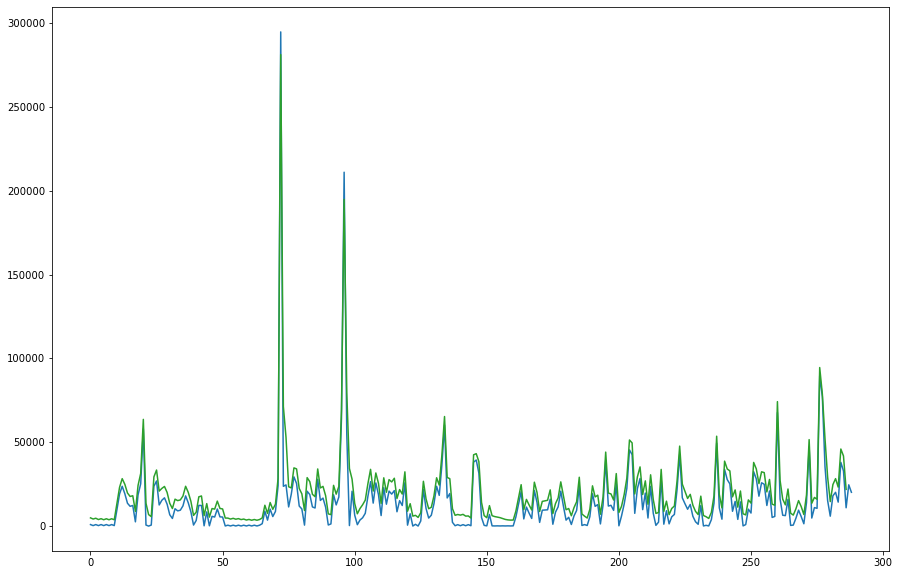

In [13]:
# shift train predictions for plotting
#trainPredictPlot = np.empty_like(dataset)
#trainPredictPlot[:, :] = np.nan
#trainPredictPlot[look_back:len(trainPredict)+look_back, 1] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, 1] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 10))
plt.plot(scaler.inverse_transform(dataset[711:])[:,1])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[712:])
plt.show()

look back = timesteps = 50, single LSTM layer

In [25]:
#batch_size = 64
from sklearn.metrics import mean_squared_error as mse
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

# Get something which has as many features as dataset
trainPredict_extended = np.zeros((len(trainPredict),2))
# Put the predictions there
trainPredict_extended[:,1] = trainPredict[:,0]
# Inverse transform it and select the 3rd column.
trainPredict = scaler.inverse_transform(trainPredict_extended) [:,1]  
#print(trainPredict)

testPredict_extended = np.zeros((len(testPredict),2))
# Put the predictions there
testPredict_extended[:,1] = testPredict[:,0]
# Inverse transform it and select the 3rd column.
testPredict = scaler.inverse_transform(testPredict_extended)[:,1]  

trainY_extended = np.zeros((len(trainY),2))
trainY_extended[:,1]=trainY[:,0]
trainY=scaler.inverse_transform(trainY_extended)[:,1]

testY_extended = np.zeros((len(testY),2))
testY_extended[:,1]=testY[:,0]
testY=scaler.inverse_transform(testY_extended)[:,1]

# calculate root mean squared error
trainScore = math.sqrt(mse(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY, trainPredict))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY, testPredict))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 15202.02 RMSE
Test Score: 17728.73 RMSE
Train Score: 86.19 RMAE
Test Score: 93.31 RMAE


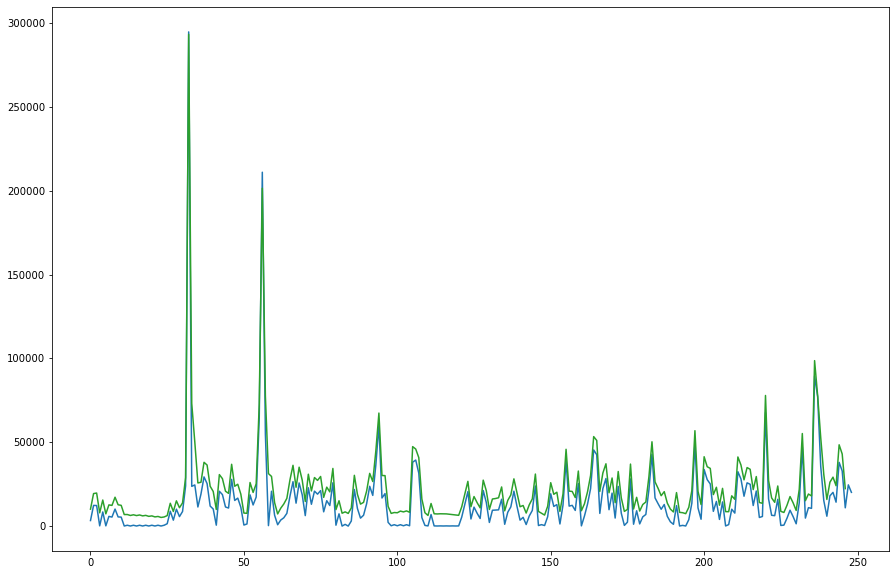

In [26]:
# shift train predictions for plotting
#trainPredictPlot = np.empty_like(dataset)
#trainPredictPlot[:, :] = np.nan
#trainPredictPlot[look_back:len(trainPredict)+look_back, 1] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, 1] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 10))
plt.plot(scaler.inverse_transform(dataset[751:])[:,1])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[752:])
plt.show()

look_back = timesteps = 1, single LSTM layer

In [38]:
#batch_size = 64
from sklearn.metrics import mean_squared_error as mse
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

# Get something which has as many features as dataset
trainPredict_extended = np.zeros((len(trainPredict),2))
# Put the predictions there
trainPredict_extended[:,1] = trainPredict[:,0]
# Inverse transform it and select the 3rd column.
trainPredict = scaler.inverse_transform(trainPredict_extended) [:,1]  
#print(trainPredict)

testPredict_extended = np.zeros((len(testPredict),2))
# Put the predictions there
testPredict_extended[:,1] = testPredict[:,0]
# Inverse transform it and select the 3rd column.
testPredict = scaler.inverse_transform(testPredict_extended)[:,1]  

trainY_extended = np.zeros((len(trainY),2))
trainY_extended[:,1]=trainY[:,0]
trainY=scaler.inverse_transform(trainY_extended)[:,1]

testY_extended = np.zeros((len(testY),2))
testY_extended[:,1]=testY[:,0]
testY=scaler.inverse_transform(testY_extended)[:,1]

# calculate root mean squared error
trainScore = math.sqrt(mse(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY, trainPredict))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY, testPredict))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 16970.42 RMSE
Test Score: 17220.85 RMSE
Train Score: 87.16 RMAE
Test Score: 89.97 RMAE


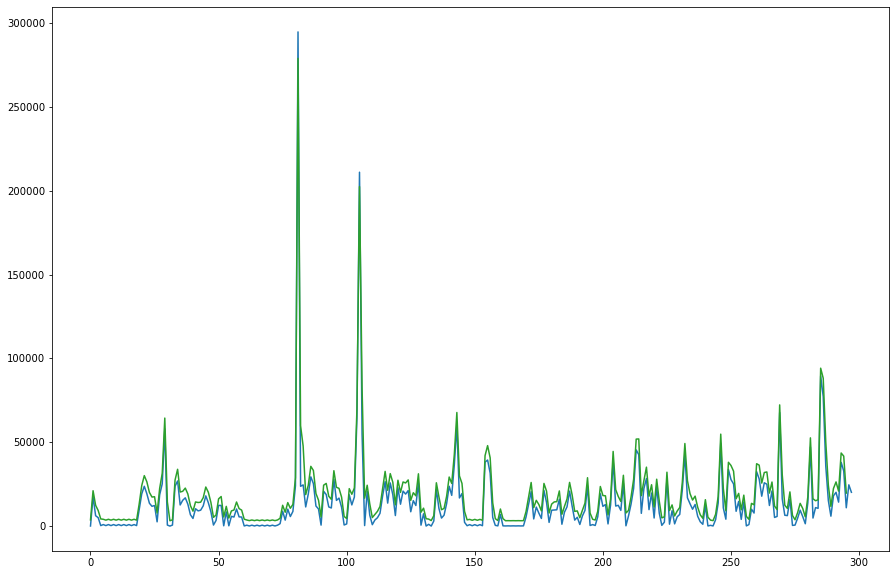

In [39]:
# shift train predictions for plotting
#trainPredictPlot = np.empty_like(dataset)
#trainPredictPlot[:, :] = np.nan
#trainPredictPlot[look_back:len(trainPredict)+look_back, 1] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, 1] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 10))
plt.plot(scaler.inverse_transform(dataset[702:])[:,1])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[703:])
plt.show()

look back = timesteps = 10, 4 LSTM layers

In [12]:
#batch_size = 64
from sklearn.metrics import mean_squared_error as mse
# make predictions
trainPredict = regressor.predict(trainX)
testPredict = regressor.predict(testX)
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

# Get something which has as many features as dataset
trainPredict_extended = np.zeros((len(trainPredict),2))
# Put the predictions there
trainPredict_extended[:,1] = trainPredict[:,0]
# Inverse transform it and select the 3rd column.
trainPredict = scaler.inverse_transform(trainPredict_extended) [:,1]  
#print(trainPredict)

testPredict_extended = np.zeros((len(testPredict),2))
# Put the predictions there
testPredict_extended[:,1] = testPredict[:,0]
# Inverse transform it and select the 3rd column.
testPredict = scaler.inverse_transform(testPredict_extended)[:,1]  

trainY_extended = np.zeros((len(trainY),2))
trainY_extended[:,1]=trainY[:,0]
trainY=scaler.inverse_transform(trainY_extended)[:,1]

testY_extended = np.zeros((len(testY),2))
testY_extended[:,1]=testY[:,0]
testY=scaler.inverse_transform(testY_extended)[:,1]

# calculate root mean squared error
trainScore = math.sqrt(mse(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY, trainPredict))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY, testPredict))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 17278.70 RMSE
Test Score: 18746.09 RMSE
Train Score: 92.71 RMAE
Test Score: 97.54 RMAE


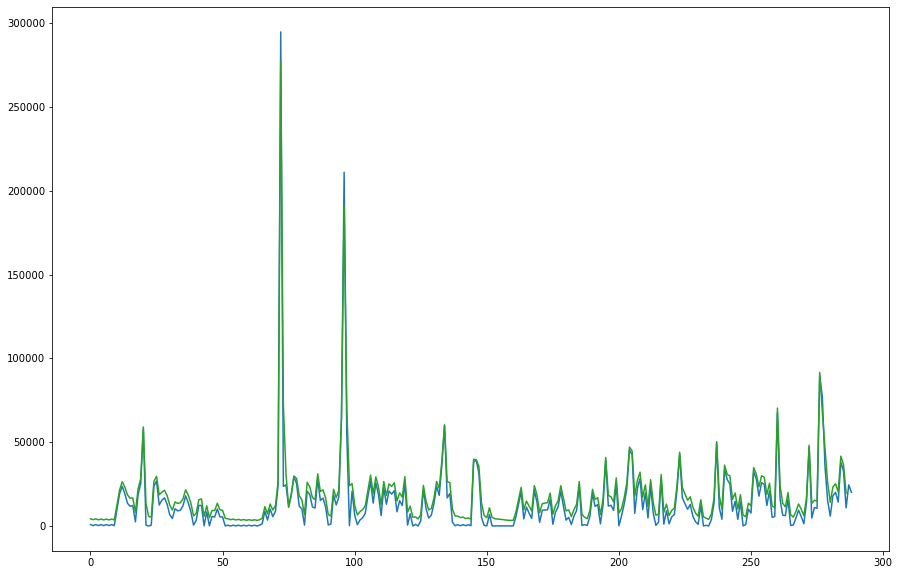

In [13]:
# shift train predictions for plotting
#trainPredictPlot = np.empty_like(dataset)
#trainPredictPlot[:, :] = np.nan
#trainPredictPlot[look_back:len(trainPredict)+look_back, 1] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, 1] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 10))
plt.plot(scaler.inverse_transform(dataset[711:])[:,1])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[712:])
plt.show()

look back = timesteps = 50, 4 LSTM layers

In [26]:
#batch_size = 64
from sklearn.metrics import mean_squared_error as mse
# make predictions
trainPredict = regressor.predict(trainX)
testPredict = regressor.predict(testX)
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

# Get something which has as many features as dataset
trainPredict_extended = np.zeros((len(trainPredict),2))
# Put the predictions there
trainPredict_extended[:,1] = trainPredict[:,0]
# Inverse transform it and select the 3rd column.
trainPredict = scaler.inverse_transform(trainPredict_extended) [:,1]  
#print(trainPredict)

testPredict_extended = np.zeros((len(testPredict),2))
# Put the predictions there
testPredict_extended[:,1] = testPredict[:,0]
# Inverse transform it and select the 3rd column.
testPredict = scaler.inverse_transform(testPredict_extended)[:,1]  

trainY_extended = np.zeros((len(trainY),2))
trainY_extended[:,1]=trainY[:,0]
trainY=scaler.inverse_transform(trainY_extended)[:,1]

testY_extended = np.zeros((len(testY),2))
testY_extended[:,1]=testY[:,0]
testY=scaler.inverse_transform(testY_extended)[:,1]

# calculate root mean squared error
trainScore = math.sqrt(mse(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY, trainPredict))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY, testPredict))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 16757.50 RMSE
Test Score: 18794.98 RMSE
Train Score: 91.84 RMAE
Test Score: 98.25 RMAE


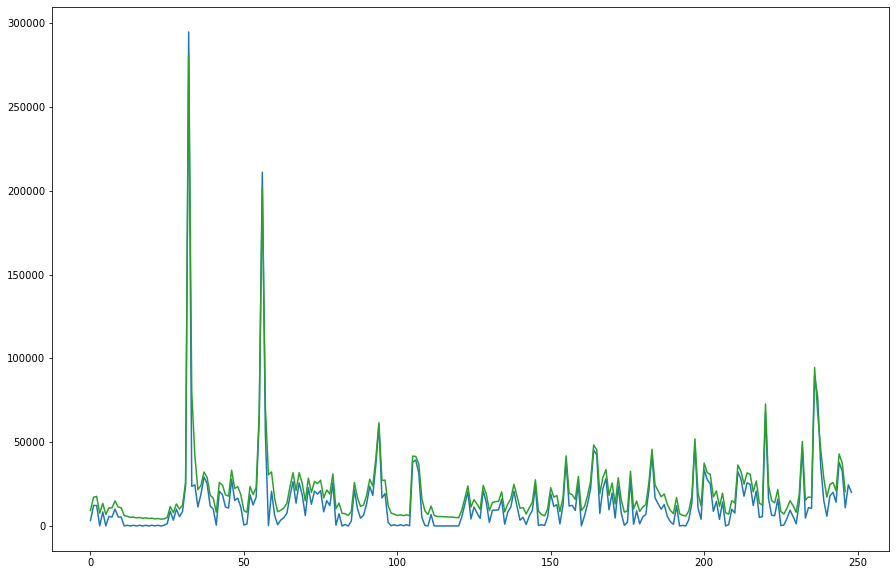

In [27]:
# shift train predictions for plotting
#trainPredictPlot = np.empty_like(dataset)
#trainPredictPlot[:, :] = np.nan
#trainPredictPlot[look_back:len(trainPredict)+look_back, 1] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, 1] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 10))
plt.plot(scaler.inverse_transform(dataset[751:])[:,1])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[752:])
plt.show()

look back = timesteps = 1, 4 LSTM layers

In [39]:
#batch_size = 64
from sklearn.metrics import mean_squared_error as mse
# make predictions
trainPredict = regressor.predict(trainX)
testPredict = regressor.predict(testX)
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

# Get something which has as many features as dataset
trainPredict_extended = np.zeros((len(trainPredict),2))
# Put the predictions there
trainPredict_extended[:,1] = trainPredict[:,0]
# Inverse transform it and select the 3rd column.
trainPredict = scaler.inverse_transform(trainPredict_extended) [:,1]  
#print(trainPredict)

testPredict_extended = np.zeros((len(testPredict),2))
# Put the predictions there
testPredict_extended[:,1] = testPredict[:,0]
# Inverse transform it and select the 3rd column.
testPredict = scaler.inverse_transform(testPredict_extended)[:,1]  

trainY_extended = np.zeros((len(trainY),2))
trainY_extended[:,1]=trainY[:,0]
trainY=scaler.inverse_transform(trainY_extended)[:,1]

testY_extended = np.zeros((len(testY),2))
testY_extended[:,1]=testY[:,0]
testY=scaler.inverse_transform(testY_extended)[:,1]

# calculate root mean squared error
trainScore = math.sqrt(mse(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY, trainPredict))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY, testPredict))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 16393.83 RMSE
Test Score: 16869.29 RMSE
Train Score: 83.47 RMAE
Test Score: 86.81 RMAE


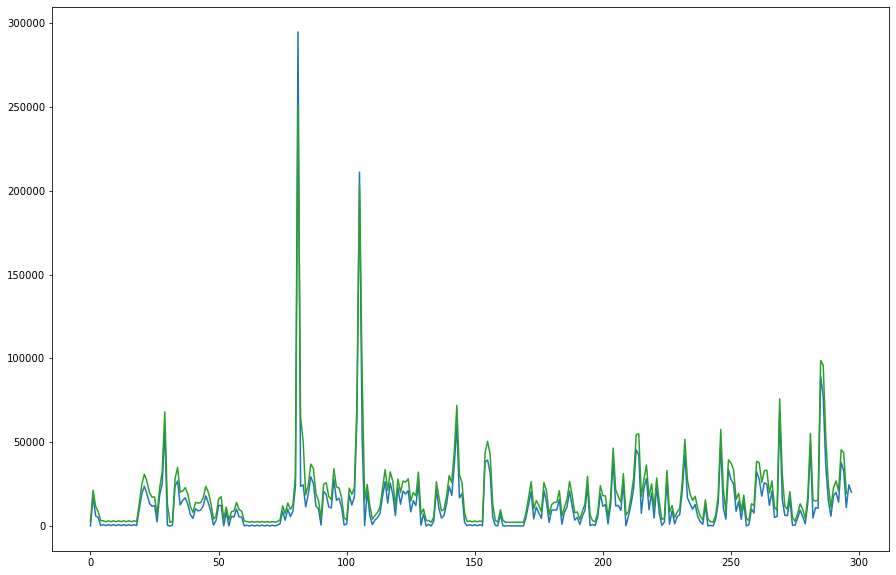

In [42]:
# shift train predictions for plotting
#trainPredictPlot = np.empty_like(dataset)
#trainPredictPlot[:, :] = np.nan
#trainPredictPlot[look_back:len(trainPredict)+look_back, 1] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, 1] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 10))
plt.plot(scaler.inverse_transform(dataset[702:])[:,1])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[703:])
plt.show()

In [14]:
testPredict

array([  2507.01430248,   1853.6629117 ,   2356.69769615,   1695.27682881,
         2176.53863993,   1416.01970871,   1929.82379701,   1312.48361925,
         1895.55045792,   1312.48361925,   1895.55045792,   1312.48361925,
        10986.4153447 ,  20869.56081579,  25986.12245291,  22413.07053152,
        17024.97691989,  14869.26198566,  15280.69451411,   5681.48147378,
        21758.73594039,  28849.37573555,  61959.03769438,  10253.95541386,
         2949.20663173,   2353.56108917,  27071.47702542,  30716.6558237 ,
        17674.5846237 ,  19565.52250393,  20815.09197063,  17051.07016833,
        10356.10315047,   7404.49742795,  13280.44655359,  12371.15847803,
        12770.74329631,  15218.41585978,  21194.52880474,  17400.9143263 ,
        11861.35920381,   3320.83690049,   5376.97709222,  14884.80634749,
        15323.68025392,   3302.45939058,  10728.97839545,   2581.28874714,
         7759.66663274,   7512.94724849,  12359.27443713,   7906.11450303,
         7539.24810109,  

In [15]:
#model.summary()
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 40)            6880      
_________________________________________________________________
dropout (Dropout)            (None, 10, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 40)            12960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 40)            12960     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 40)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 40)                1

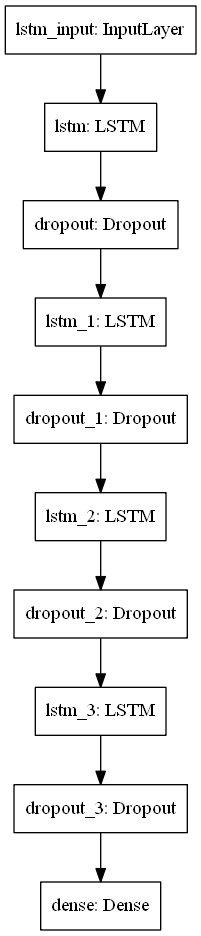

In [16]:
from tensorflow.keras.utils import plot_model
#plot_model(model, to_file = 'model.png')
plot_model(regressor, to_file = 'model.png')

In [15]:
model.save('0323_U08D00_1layer_MultiAiGi-1_looktime10_624990_195000_.h5', include_optimizer=False)